## 查詢CUDA版本版本和顯卡配置

In [1]:
!/usr/local/cuda/bin/nvcc --version
!nvidia-smi

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
Thu Jul 29 05:51:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    13W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |         

## 下載darknet源碼

In [2]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15287, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 15287 (delta 0), reused 1 (delta 0), pack-reused 15283
Receiving objects: 100% (15287/15287), 13.66 MiB | 20.54 MiB/s, done.
Resolving deltas: 100% (10374/10374), done.


## 查看Makefile

In [3]:
!head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## 啟用GPU、CUDNN、OPENCV

In [4]:
!sed -i 's/GPU=0/GPU=1/g' darknet/Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' darknet/Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' darknet/Makefile

## 查看Makefile

In [5]:
!head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



# 編譯darknet

In [6]:
!cd darknet;make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

## 複製yolov4-custom.cfg為yolo-obj.cfg

In [7]:
!cp darknet/cfg/yolov4-custom.cfg darknet/cfg/yolo-obj.cfg

## 根據作者所述更改yolo4-obj.cfg
- [x] batch=64
- [x] subdivisions=16
- [x] width=416
- [x] height=416
- [x] max_batches=your classes * 2000
- [x] steps=max_batches*80%,max_batches*90%
- [x] classes=your classes in 3 [yolo]layers
- [x] filters=(classes + 5)x3 in 3 [convolutional] before each [yolo]layer
- [ ] [Gaussian_yolo] filters=(classes + 9)x3 in 3 [convolutional] before each [Gaussian_yolo]



In [8]:
!sed -i '8s/608/416/' darknet/cfg/yolo-obj.cfg
!sed -i '9s/608/416/' darknet/cfg/yolo-obj.cfg
!sed -i '20s/500500/2000/' darknet/cfg/yolo-obj.cfg
!sed -i '22s/400000/1600/' darknet/cfg/yolo-obj.cfg
!sed -i '22s/450000/1800/' darknet/cfg/yolo-obj.cfg
!sed -i '963s/255/18/' darknet/cfg/yolo-obj.cfg
!sed -i '970s/80/1/' darknet/cfg/yolo-obj.cfg
!sed -i '1051s/255/18/' darknet/cfg/yolo-obj.cfg
!sed -i '1058s/80/1/' darknet/cfg/yolo-obj.cfg
!sed -i '1139s/255/18/' darknet/cfg/yolo-obj.cfg
!sed -i '1146s/80/1/' darknet/cfg/yolo-obj.cfg

## 新增obj.names,obj.data檔案並寫入




In [9]:
import os 
obj_names_path = 'darknet/build/darknet/x64/data/obj.names'
obj_data_path = 'darknet/build/darknet/x64/data/obj.data'

os.mknod(obj_names_path)

os.mknod(obj_data_path)

f_names = open(obj_names_path,'w')
f_names.write('Cottontail-Rabbit\n')
f_names.close()

f_data = open(obj_data_path,'w')
seq = ['classes = 1\n',
       'train = /content/darknet/build/darknet/x64/data/train.txt\n',
       'valid = /content/darknet/build/darknet/x64/data/valid.txt\n',
       'names = /content/darknet/build/darknet/x64/data/obj.names\n',
       'backup = backup/\n']

f_data.writelines(seq)
f_data.close()

## 連接雲端硬碟

In [10]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


## 查看雲端硬碟檔案
* yolov4.conv.137 : 預訓練權重

* [dataset](https://public.roboflow.com/object-detection/cottontail-rabbits-video-dataset)




In [11]:
os.listdir('drive/My Drive') 

['yolov4.conv.137',
 'yolov4-custom-dataset.ipynb',
 'Colab Notebooks',
 'dataset',
 'Cottontail-Rabbit.jpg']

## 複製自訂數據集到obj資料夾

note: 耗時過長，直接從雲端調用


In [12]:
#!cp -r drive/MyDrive/dataset darknet/build/darknet/x64/data/obj


## 確認obj資料夾
- [x] 同名jpg,txt檔

In [13]:
!ls /content/drive/MyDrive/dataset/train

06-07-rabbits_jpg.rf.00d102740982dad9fe2c3cbddffc4f8b.jpg
06-07-rabbits_jpg.rf.00d102740982dad9fe2c3cbddffc4f8b.txt
06-07-rabbits_jpg.rf.04d3208042c07478d1536891101e0ce1.jpg
06-07-rabbits_jpg.rf.04d3208042c07478d1536891101e0ce1.txt
06-07-rabbits_jpg.rf.062d42a665cc2d9dcf1b78c0ce40ae37.jpg
06-07-rabbits_jpg.rf.062d42a665cc2d9dcf1b78c0ce40ae37.txt
06-07-rabbits_jpg.rf.103f96525bc1f708c04ba4aea42eaf45.jpg
06-07-rabbits_jpg.rf.103f96525bc1f708c04ba4aea42eaf45.txt
06-07-rabbits_jpg.rf.11c403e162a99bab5c62cbd39b3af6cd.jpg
06-07-rabbits_jpg.rf.11c403e162a99bab5c62cbd39b3af6cd.txt
06-07-rabbits_jpg.rf.1d027430231f7d5c6c85e4c660fb16c3.jpg
06-07-rabbits_jpg.rf.1d027430231f7d5c6c85e4c660fb16c3.txt
06-07-rabbits_jpg.rf.242eb448caf92eaa21d35dd4a216b2ad.jpg
06-07-rabbits_jpg.rf.242eb448caf92eaa21d35dd4a216b2ad.txt
06-07-rabbits_jpg.rf.2437f61017d2d0919847c6f23f5b0711.jpg
06-07-rabbits_jpg.rf.2437f61017d2d0919847c6f23f5b0711.txt
06-07-rabbits_jpg.rf.2ddeb9a1c53c303945e493bc3f758ee0.jpg
06-07-rabbits_

## 確認jpg圖檔和txt檔格式

In [14]:
!cat /content/drive/MyDrive/dataset/train/06-07-rabbits_jpg.rf.00d102740982dad9fe2c3cbddffc4f8b.txt

0 0.5420673076923077 0.4387019230769231 0.3269230769230769 0.2536057692307692
0 0.34975961538461536 0.5240384615384616 0.16105769230769232 0.11778846153846154

## 顯示數據集圖片

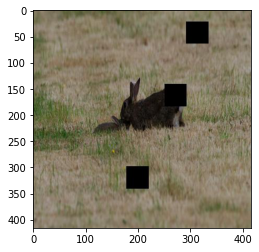

In [15]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open('/content/drive/MyDrive/dataset/train/06-07-rabbits_jpg.rf.00d102740982dad9fe2c3cbddffc4f8b.jpg')
plt.imshow(img)

## 新增train.txt,valid.txt,test.txt檔案
* 絕對路徑或相對路徑皆可

In [16]:
import glob

set = ['train','valid','test']
for i in set:
  file_path = '/content/darknet/build/darknet/x64/data/' + i + '.txt'
  os.mknod(file_path)
  f = open(file_path,'w')
  for name in glob.glob('/content/drive/MyDrive/dataset/' + i + '/*.jpg'):
    f.write(name + '\n')

  f.close()


!cat darknet/build/darknet/x64/data/train.txt

/content/drive/MyDrive/dataset/train/2020-06-21_08_18_44_An_eastern_cottontail_rabbit_along_Tayloe_Court_in_the_Franklin_Farm_section_of_Oak_Hill-_Fairfax_County-_Virginia_jpg.rf.e4853c98fbe162ee726830798d028aa4.jpg
/content/drive/MyDrive/dataset/train/49955726168_5e46752301_b_jpg.rf.e4164b1b1bf36f5c1a4b5cffe3cbebe5.jpg
/content/drive/MyDrive/dataset/train/birds-and-bunnies-004-1920_jpg.rf.e315d253b95a88d1df4c4a048fbe1166.jpg
/content/drive/MyDrive/dataset/train/new-england-cottontain-mammal-sylvilagus-transitionalis-296x225_jpg.rf.8a6982981c6ddc76b0b40351ede4ad4b.jpg
/content/drive/MyDrive/dataset/train/images3_jpg.rf.1767df85503bde32309c91f1846d902b.jpg
/content/drive/MyDrive/dataset/train/7823438884_12ce010a5f_b_jpg.rf.7433fd88a14a1984d5f7d43d60643dd9.jpg
/content/drive/MyDrive/dataset/train/a-hare-next-to-some-leaves-rabbit-animal_jpg.rf.3b7f2fc523f213847bf5ff436d8c4519.jpg
/content/drive/MyDrive/dataset/train/gray-rabbit-beside-plant-during-daytime-kangaroo-animal_jpg.rf.698c8a136

## github下載預訓練權重並移至weights資料夾

In [17]:
weights_path = '/content/weights'
if os.path.exists(weights_path):
  try:
    shutil.rmtree(weights_path)
  except OSError as e:
    print(e)
!mkdir weights
!cp drive/MyDrive/yolov4.conv.137 weights

##開始訓練

In [18]:
!cd darknet;./darknet detector train build/darknet/x64/data/obj.data cfg/yolo-obj.cfg /content/weights/yolov4.conv.137 -dont_show 

串流輸出內容已截斷至最後 5000 行。
 total_bbox = 945214, rewritten_bbox = 0.000000 % 

 1926: 0.348496, 0.412094 avg loss, 0.000010 rate, 11.508281 seconds, 123264 images, 0.335272 hours left
Loaded: 0.000053 seconds
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.516170), count: 1, class_loss = 0.436070, iou_loss = 6.693799, total_loss = 7.129869 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.775126), count: 12, class_loss = 1.977057, iou_loss = 6.592926, total_loss = 8.569983 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.894140), count: 25, class_loss = 0.127971, iou_loss = 2.412818, total_loss = 2.540789 
 total_bbox = 945252, rewritten_bbox = 0.000000 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.784437), count: 3, class_loss = 0.738026, iou_loss = 8.775457, total_loss = 9.513483 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 1

##預測
- [x] batch=1
- [x] subdivisions=1

In [19]:
!sed -i 's/batch=64/batch=1/g' darknet/cfg/yolo-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/g' darknet/cfg/yolo-obj.cfg

In [23]:
!cd darknet;./darknet detector test build/darknet/x64/data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_final.weights ../drive/MyDrive/Cottontail-Rabbit.jpg -thresh 0.25

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 

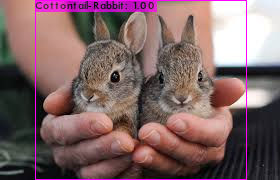

In [24]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')